# Thin-lens scheimpflug imaging models

In [5]:
from __future__ import print_function, division
import numpy as np
import numpy.linalg as linalg
from math import tan, pi, atan, cos, sin, asin
import matplotlib.pyplot as plt
from scipy.misc import imread as imread

# For IPython interactive widgets
from ipywidgets import interact, interactive, FloatSlider 
from IPython.display import display, Image

from iutils.optics.goptics import gaussian_lens_formula
import iutils.plot.mplutils as mpu


tand = lambda angle: tan(pi*angle/180.0)
cosd = lambda angle: cos(pi*angle/180.0)
sind = lambda angle: sin(pi*angle/180.0)
arctand = lambda x : np.rad2deg(np.arctan(x))

def is_even(num):
    return num%2 == 0

%matplotlib inline

## Focal plane (image plane) tilt

The figure depicts the tilted focal plane (FP), the lens plane (LP), the plane of sharp focus (PoSF) and the optical axis. `A'` is the image of `A` (in geometric focus), and `B'` is the image of `B`.

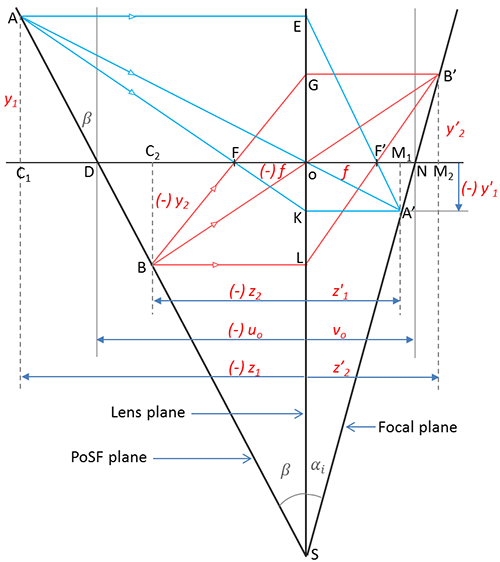

In [2]:
Image("images/thinLensModel_FocalPlaneTilt_small.png")

In the following section we shall derive the relationship between an object point $(y, z)$ and the image point $(y', z')$ in scheimpflug imaging configuration. Note that both $(y, z)$ and $(y', z')$ are in the same coordinate system that is centered at the lens center $O$.

##### The image point's y-coordinate from object point's y-coordinate

In the object side, $\bigtriangleup FC_2B \sim \bigtriangleup FOG$

Therefore, $\frac{FC_2}{C_2B} = \frac{FO}{OG}$

$\frac{FD + DC_2}{-y_2} = \frac{-f}{y_2'}$

Now, $FD$ equals $-u_o - (-f)$, which we may write as $-(u_o - f)$. Then the above equation becomes

$\frac{-(u_o - f) + (-y_2) \tan(\beta)}{-y_2} = \frac{-f}{y_2'}$

or

$$y_2' = \frac{f y_2}{-(u_o - f) - y_2 \tan(\beta)} \hspace{40pt} (1)$$


Also, in the object side, $\bigtriangleup FC_1A \sim \bigtriangleup FOK$

(Note that we really didn't have to work-out the equations for another point, $y_1$; however, we shall do it anyway to ensure that the equations are symmetric and as we expect.)

Therefore, $\frac{FC_1}{C_1A} = \frac{FO}{OK}$

$\frac{-(FD + DC_1)}{y_1} = \frac{-f}{-y_1'}$

or,

$$ y_1' = \frac{f y_1}{-(u_o-f) -y_1 \tan(\beta)} \hspace{40pt} (2)$$


From equations $(1)$ and $(2)$ we get the expression for $y'$ in terms of $y$:

$y' = \frac{f y}{-(u_o - f) - y ~ \tan(\beta)}$

or

$$\boxed{y' = \frac{- f y}{(u_o - f) + y ~ \tan(\beta)}}  \hspace{40pt} (3)$$


##### The object point's y-coordinate from the image piont's y-coordinate

In the image side, $\bigtriangleup F'OL \sim \bigtriangleup F'M_2B'$

$\therefore \frac{OF'}{OL} = \frac{F'M_2}{M_2B'}$

or 

$\frac{f}{-y_2} = \frac{F'N + NM_2}{y_2'}$

or

$\frac{f}{-y_2} = \frac{(v_o - f) + y_2' \tan(\alpha_i)}{y_2'}$

or

$$(4) \hspace{40pt} y_2 = \frac{-f y_2'}{(v_o - f) + y_2' \tan(\alpha_i)} $$


Also, $\bigtriangleup F'OE \sim F'M_1A'$

$\therefore \frac{F'O}{OE} = \frac{F'M_1}{M_1 A'}$ 

or

$\frac{f}{y_1} = \frac{F'M_1}{-y_1'}$ 

or

$\frac{f}{y_1} = \frac{F'N - NM_1}{-y_1'}$ 

or

$\frac{f}{y_1} = \frac{(v_o - f) - (-y_1') \tan(\alpha_i)}{-y_1'}$

or 

$$(5) \hspace{40pt} y_1 = \frac{-f y_1'}{(v_o - f) + y_1' \tan(\alpha_i)}$$


From equations $(4)$ and $(5)$ we get the expression for $y$ in terms of $y'$:

$$(6) \hspace{40pt} \bbox[#99FFCC, 2pt]{y = \frac{- f y'}{(v_o - f) + y' ~ \tan(\alpha_i)}}$$

##### Image point's axial distance from the lens-center ($z'$)

$\bigtriangleup OLB \sim OGB'$

$\therefore \frac{OL}{LB} = \frac{OG}{GB'}$

or

$\frac{-y_2}{-z_2} = \frac{y_2'}{z_2'}$

or

$\frac{-y_2}{-z_2} = \frac{y_2'}{z_2'}$

or

$z_2' = \frac{y_2'}{y_2}z_2 $

For any image point the equation is

$$(7) \hspace{40pt} z' = \frac{y'}{y}z$$


Substituting $y'/y$ from $(3)$, we get

$z' = \frac{f z}{-(u_o - f) - y ~ \tan(\beta)}$

or

$$(8) \hspace{40pt} \boxed{z' = \frac{-f z}{(u_o - f) + y ~ \tan(\beta)}} $$


##### Object point's axial distance from the lens-center ($z$) 

From equation $(7)$, we have

$z = \frac{y}{y'} z'$

Substituting $y/y'$ from equation $(6)$, we get

$$(9) \hspace{40pt} \bbox[#99FFCC, 2pt]{z = \frac{-f z'}{(v_o - f) + y' ~ \tan(\alpha_i)}}$$


**Note on using the above equations**

When using equations ($3$, $6$, $8$ & $9$), appropriate sign conventions must be considered for $z$, $z'$, $y$ and $y'$. ($u_o$, $v_o$ and $f$ are assumed positive quantities in the above equations as their signs have already been accounted for during the derivation of these equations).

##### Relation between $\alpha_i$ and $\beta$

From $\bigtriangleup SOD$ and $\bigtriangleup SON$, we have

$SO = \frac{-u_o}{\tan(\beta)} = \frac{v_o}{\tan(\alpha_i)}$

from which we get 

$$(10) \hspace{40pt}\boxed{u_o \tan(\alpha_i) = - v_o \tan(\beta)} $$

The negative sign indicates that the focal plane and the plane of sharp focus rotates in opposite directions with respect to each other.

In [3]:
bAddPeopleImg = True

def get_alphai(beta, uo, vo):
    """returns image plane angle w.r.t. vertical axis 

    Parameters
    ---------- 
    beta : float 
        angle of PoSF, in degrees measured in anti-clockwise direction 
    uo : float 
        PoSF distance from the lens center 
    vo : float 
        image plane disance from the lens center 

    Returns
    -------
    alphai : float 
        angle of image plane w.r.t. vertical axis measured in clockwise
        direction 
    """
    return atan((vo/uo)*tand(beta))*180.0/pi

def get_beta(alphai, vo, uo):
    """returns PoSF angle in degrees measured in anti-clockwise direction 

    see docstring of ``get_alphai()``
    """
    return atan((uo/vo)*tand(alphai))*180.0/pi

def get_ydash_from_y_uo_beta(f, beta, uo, y):
    """returns y-coordinate of image point given, y coordinate of object 
    point that is in sharp focus in scheimpflug configuration 
    """
    return (-f*y)/((uo - f) + y*tand(beta))

def get_zdash(f, beta, uo, y, z):
    """returns z-coordinate of image point given y and z coordinates of 
    object point that is in sharp focus in scheimpflug configuration.
    """
    zdash = -f*z/((uo - f) + y*tand(beta))
    return zdash

def get_y_from_ydash_vo_alphai(f, alphai, vo, ydash):
    """returns y-coordinate of object point given y coordinate of image 
    point that is in sharp focus in scheimpflug configuration.
    """
    y = 0.0
    try:
        y = (-f*ydash)/(vo - f + ydash*tand(alphai))
    except ZeroDivisionError:
        sgnYdash = -1 if ydash < 0 else 1
        y = -1e20*sgnYdash  # infinity (toggle sign) 
    return y

def get_z(f, alphai, vo, ydash, zdash):
    """returns z-coordinate of object point given z coordinate of image 
    point that is in sharp focus in scheimpflug configuration. 
    """
    z = 0.0
    try:
        z = -f/(vo - f + ydash*tand(alphai))*zdash
    except ZeroDivisionError:
        z = -1e20   # - infinity
    return z

def get_line_coordinates(angle, numPts, segLen, absOri=0, ordOri=0):
    """return a set of abscissa and ordinates of a suface that is tilted by
    ``angle`` w.r.t. the horizontal axis

    angle : float
        angle, in degrees, of the line with respect to horizontal axis
    numPts : integer
        number of points. If ``numPts`` is odd, then the point (absOri,ordOri)
        is also included. If ``numPts`` is even, the point is included, although
        the line should pass through the point anyway.
    segmentLen : float
        distance between points

    Returns
    -------
    abscissae : list
        the list of abscissae of the coordinates
    ordinates : list
        the list of corresponding ordinates of the coordinates
    """
    vec = range(-(numPts//2), numPts//2+1)
    if is_even(numPts):
        vec.remove(0)
    abscissae = [absOri + segLen*i*cosd(angle) for i in vec]
    ordinates = [ordOri + segLen*i*sind(angle) for i in vec]
    return abscissae, ordinates

def draw_scheimpflug_img(f, uo, vo, beta, alphai, posfZ, posfY, lpZ, lpY,
                         fpZ, fpY, scheimpflugLnFmLensCtr, hingeLnFmFFocalPt):
    """actual function to draw all the planes to demonstrate scheimpflug imaging
    
    """
    global bAddPeopleImg
    # Figure
    #fig, ax = plt.subplots(1,1)
    fig = plt.figure(figsize=(16,10))
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])
    zcoordiantes = posfZ + lpZ + fpZ
    #xlimMin, xlimMax = min(zcoordiantes) - 5, max(zcoordiantes) + 5
    xlimMin, xlimMax = -250, 80 # using fixed numbers to keep the plot size fixed during animation
    if scheimpflugLnFmLensCtr:
        iPt = scheimpflugLnFmLensCtr
        ycoordinates =  posfY + lpY + fpY + [iPt, -0.2*iPt]
    else:
        ycoordinates =  posfY + lpY + fpY
    #ylimMin, ylimMax = min(ycoordinates) -5, max(ycoordinates) + 5
    ylimMin, ylimMax = -200, 30  # using fixed numbers to keep the plot size fixed during animation
    ax.set_xlim([xlimMin, xlimMax])
    ax.set_ylim([ylimMin, ylimMax])
    # draw the rigid camera image and object planes
    ax.axvline(x=-uo, ymin=0.1, ymax=0.9, color='#AAAAAA', linewidth=1.0)
    ax.axvline(x=vo, ymin=0.1, ymax=0.9, color='#AAAAAA', linewidth=1.0)
    # draw the PoSF, lens and focal planes
    ax.plot(lpZ, lpY, lw=2)        # lens plane
    ax.plot(posfZ, posfY, lw=2)    # posf plane
    ax.plot(fpZ, fpY, lw=2)        # focal plane
    # draw lines of intersection
    if scheimpflugLnFmLensCtr:
        ax.plot([posfZ[-1], 0], [posfY[-1], scheimpflugLnFmLensCtr],
                color="#F52080", linewidth=1.0)
        ax.plot([fpZ[0], 0], [fpY[0], scheimpflugLnFmLensCtr],
                color="#00CC60", linewidth=1.0)
        ax.plot([-f, -f], [0, hingeLnFmFFocalPt],
                color="#AAAAAA", linewidth=1.0, linestyle='dashed')
        ax.plot([0, -f], [0, hingeLnFmFFocalPt],
                color="#AAAAAA", linewidth=1.0, linestyle='dashed')
        ax.scatter([0, -f], [scheimpflugLnFmLensCtr, hingeLnFmFFocalPt],
                   c=['b', 'r'])
    # set ticks and spines
    mpu.set_spines(axes=[ax], stype='center_data')
    #majTicLoc = plt.MultipleLocator(10)
    #minTicLoc = plt.MultipleLocator(5)
    majTicLoc = plt.MaxNLocator(25)
    minTicLoc = plt.MaxNLocator(50)
    ax.xaxis.set_major_locator(majTicLoc)
    ax.xaxis.set_minor_locator(minTicLoc)
    ax.yaxis.set_major_locator(majTicLoc)
    ax.yaxis.set_minor_locator(minTicLoc)
    ax.set_aspect('equal')
    # Display text information
    fpText = "$v_o = {:2.2f}, \\, \\alpha_i = {:2.2f}$".format(vo, alphai)
    posfText = "$u_o = {:2.2f}, \\, \\beta = {:2.2f}$".format(uo, beta)
    ax.text(0.1, 0.14, fpText, transform=ax.transAxes, fontsize=18)
    ax.text(0.1, 0.10, posfText, transform=ax.transAxes, fontsize=18)
    if bAddPeopleImg:
        pplImg = imread("images\people.png")
        ax.imshow(pplImg, extent=[-136, -103, -50, -20])
    plt.show()

def render_scheimpflug_obj_tilt(f, uo, beta):
    """render scheimpflug imaging configuration using object plane tilt and
    distance of object from lens center
    
    Parameters
    ----------
    f : float
        focal length
    uo : float
        object plane distance from lens center along the optical axis
    beta : float
        object plane angle with respect to vertical axis
        
    Notes
    -----
    Use positive value for ``uo`` when calling this function.
    """
    vo = gaussian_lens_formula(u=uo, f=f).v
    alphai = get_alphai(beta, uo, vo)
    lpZ, lpY = get_line_coordinates(angle=90, numPts=3, segLen=10)
    posfZ, posfY = get_line_coordinates(angle=90+beta, numPts=3, segLen=10,
                                          absOri=-uo, ordOri=0)
    #
    fpY = [get_ydash_from_y_uo_beta(f, beta, uo, y) for y in posfY]
    fpZ = [get_zdash(f, beta, uo, y, z) for y, z in zip(posfY, posfZ)]
    # Warnings
    if (min(fpZ) <= f):
        print("WARNING: One or more FP point is to the left of F'!" )
    try:
        scheimpflugLnFmLensCtr = -vo/tand(alphai)
        hingeLnFmFFocalPt = -(uo-f)/tand(beta)
    except ZeroDivisionError:
        scheimpflugLnFmLensCtr = None
        hingeLnFmFFocalPt = None
    draw_scheimpflug_img(f, uo, vo, beta, alphai, posfZ, posfY, lpZ, lpY,
                         fpZ, fpY, scheimpflugLnFmLensCtr, hingeLnFmFFocalPt)

def render_scheimpflug_fp_tilt(f, vo, alphai):
    """render scheimpflug imaging configuration using focal plane tilt and
    distance sliders
    
    Parameters
    ----------
    f : float
        focal length
    vo : float
        distance of focal plane from thin lens center
    alphai : float
        angle of FP w.r.t. verical axis
        
    """
    uo = gaussian_lens_formula(v=vo, f=f).u
    beta = get_beta(alphai, vo, uo)
    lpZ, lpY = get_line_coordinates(angle=90, numPts=3, segLen=20)
    fpZ, fpY = get_line_coordinates(angle=90-alphai, numPts=3, segLen=5,
                                      absOri=vo, ordOri=0)
    #
    posfY = [get_y_from_ydash_vo_alphai(f, alphai, vo, ydash) for ydash in fpY]
    posfZ = [get_z(f, alphai, vo, ydash, zi) for ydash, zi in zip(fpY, fpZ)]
    
    # Warnings
    if (min(fpZ) <= f):
        print("WARNING: One or more FP point is to the left of F'!" )
    try:
        scheimpflugLnFmLensCtr = -vo/tand(alphai)
        hingeLnFmFFocalPt = -(uo-f)/tand(beta)
    except ZeroDivisionError:
        scheimpflugLnFmLensCtr = None
        hingeLnFmFFocalPt = None
    draw_scheimpflug_img(f, uo, vo, beta, alphai, posfZ, posfY, lpZ, lpY,
                         fpZ, fpY, scheimpflugLnFmLensCtr, hingeLnFmFFocalPt)

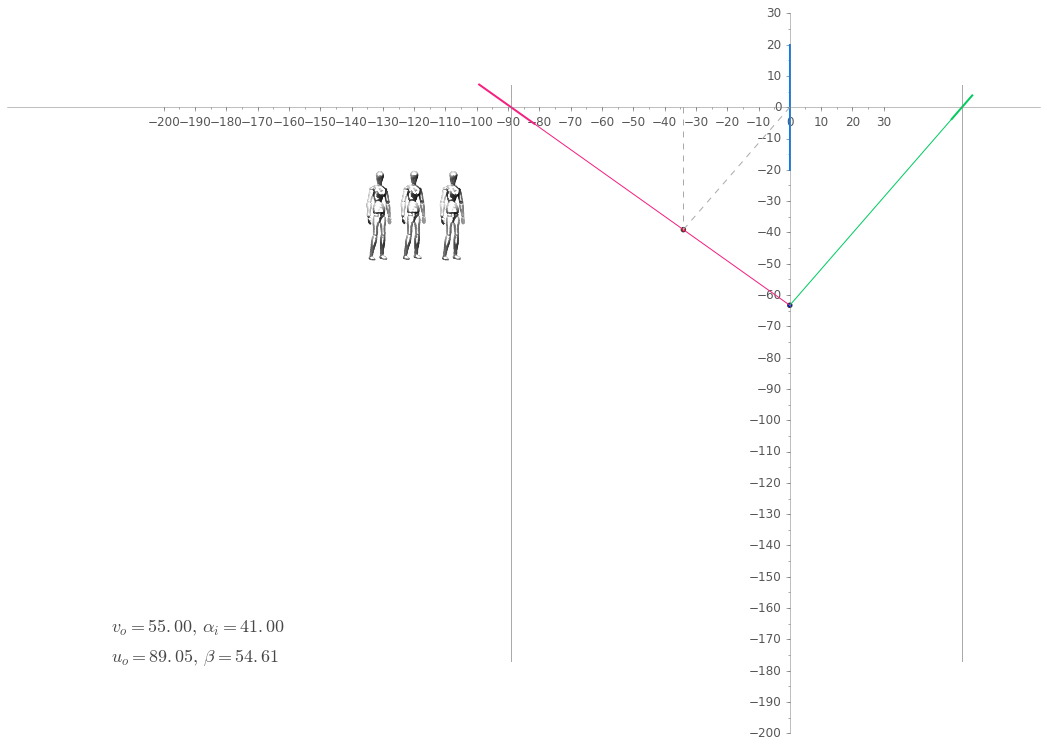

In [6]:
fSldr = FloatSlider(value=34, min=10.0, max=50, step=0.25)
voSldr = FloatSlider(value=55, min=15.0, max=60, step=0.25)
alphaiSldr = FloatSlider(value=0, min=0.0, max=50, step=0.25)
w = interactive(render_scheimpflug_fp_tilt, f=fSldr, vo=voSldr, alphai=alphaiSldr)
w.msg_throttle = 1
display(w)
#34, 47.5, 0 for rigid cam 
#34, 38, 45  for scheimpflug cam

## Lens plane tilt

TO DO:

1. It seems that the computation of `ydash` and `zdash`, are very similar. So, a huge amount of computation may be saved if they are computed in the same function and returned together.

In [9]:
bAddPeopleImg = False

redu = lambda flt : [eval("{0:0.3f}".format(i)) for i in flt]

def Rot2D(angle):
    """Rotation matrix for coordinate transformation
    from world coordinates to the rotated coordiantes
    """
    r = np.matrix(((cosd(angle), -sind(angle)),
                   (sind(angle),  cosd(angle))))
    return r

def get_rows_from_matrix(mat):
    """return rows as list extracted from numpy matrix
    mat = numpy matrix
    rows = list of rows     
    """
    arr = np.array(mat)
    rows = []
    for i in range(len(arr)):
        rows.append(arr[i, :].tolist())
    return rows

def get_alphaL(beta, uo, f):
    """returns lens plane angle w.r.t. vertical axis 

    Parameters
    ---------- 
    beta : float 
        angle of PoSF, in degrees measured in anti-clockwise direction 
    uo : float 
        PoSF distance from the lens center (along the un-rotated optical axis) 
    f : float 
        focal length

    Returns
    -------
    alphaL : float 
        angle of lens plane w.r.t. vertical axis measured in anti-clockwise
        direction 
    """
    return asin((f/uo)*tand(beta))*180.0/pi

def get_beta(alphaL, f, uo):
    """returns PoSF angle in degrees measured in anti-clockwise direction 

    see docstring of ``get_alphaL()``
    """
    return atan((uo/f)*sind(alphaL))*180.0/pi

def get_uotilde(uo, alphaL, beta):
    return uo/(cosd(alphaL)*(1 + tand(alphaL)*tand(beta)))

def get_to(uo, f, alphaL):
    """to : distance from the lens center to the image plane along the 
    old optical axis. to >= vo. to = vo when alpha_L = 0
    """
    return (uo*f)/(uo*cosd(alphaL) - f)

def get_totilde(uo, f, alphaL):
    """totilde : distance from the lens center to the image plane along 
    the (new) tilted optical axis. totilde > vo
    """
    return get_to(uo, f, alphaL)/cosd(alphaL)

def get_ydash_from_y_uo_beta(f, beta, alphaL, uo, y):
    """returns y-coordinate of image point given, y coordinate of object 
    point that is in sharp focus in scheimpflug configuration 
    """
    ut = get_uotilde(uo, alphaL, beta)
    return (-f*y)/(ut - f - y*tand(alphaL - beta))
    
def get_zdash(f, beta, uo, y, z):
    """returns z-coordinate of image point given y and z coordinates of 
    object point that is in sharp focus in scheimpflug configuration.
    
    Note: 
    1. the zdash, z and y are in the reference frame attached to the lens plane
    """
    ut = get_uotilde(uo, alphaL, beta)
    zdash = -f*z/(ut - f - y*tand(alphaL - beta))
    return zdash

def get_y_from_ydash_f_alphaL(f, alphaL, beta, uo, ydash):
    """returns y-coordinate of object point given y coordinate of image 
    point that is in sharp focus in scheimpflug configuration.
    
    Note: 
    1. the ydash and y are in the reference frame attached to the lens plane
    """
    y = 0.0
    ut = get_uotilde(uo, alphaL, beta)
    try:
        y = (-f*ydash)/(ut - f + ydash*tand(alphaL - beta))
    except ZeroDivisionError:
        sgnYdash = -1 if ydash < 0 else 1
        y = -1e20*sgnYdash  # infinity (toggle sign) 
    return y

def get_z(f, alphai, uo, ydash, zdash):
    """returns z-coordinate of object point given z coordinate of image 
    point that is in sharp focus in scheimpflug configuration. 
    
    Note:
    1. in reference frame attached to the lens plane
    """
    z = 0.0
    tt = get_totilde(uo, f, alphaL)
    try:
        z = -(f*zdash)/(tt - f + ydash*tand(alphaL))
    except ZeroDivisionError:
        z = -1e20   # - infinity
    return z

def get_line_coordinates(angle, numPts, segLen, absOri=0, ordOri=0):
    """return a set of abscissa and ordinates of a suface that is tilted by
    ``angle`` w.r.t. the horizontal axis

    angle : float
        angle, in degrees, of the line with respect to horizontal axis
    numPts : integer
        number of points. If ``numPts`` is odd, then the point (absOri,ordOri)
        is also included. If ``numPts`` is even, the point is included, although
        the line should pass through the point anyway.
    segmentLen : float
        distance between points
    absOri : float
        coordinate of abscissa origin
    ordOri : float
        coordinate of ordinate origin

    Returns
    -------
    abscissae : list
        the list of abscissae of the coordinates
    ordinates : list
        the list of corresponding ordinates of the coordinates
    """
    vec = range(-(numPts//2), numPts//2+1)
    if is_even(numPts):
        vec.remove(0)
    abscissae = [absOri + segLen*i*cosd(angle) for i in vec]
    ordinates = [ordOri + segLen*i*sind(angle) for i in vec]
    return abscissae, ordinates


def draw_scheimpflug_img_lens_tilt(f, uo, to, beta, alphaL, posfZ, posfY, lpZ, lpY,
                         fpZ, fpY, scheimpflugLnFmLensCtr, hingeLnFromLensCtr):
    """actual function to draw all the planes to demonstrate scheimpflug imaging using
    lens tilt
    
    """
    global bAddPeopleImg
    # Figure
    #fig, ax = plt.subplots(1,1)
    fig = plt.figure(figsize=(16,10))
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])
    zcoordiantes = posfZ + lpZ + fpZ
    #xlimMin, xlimMax = min(zcoordiantes) - 5, max(zcoordiantes) + 5
    xlimMin, xlimMax = -250, 120 # using fixed numbers to keep the plot size fixed during animation 
    
    if scheimpflugLnFmLensCtr:
        iPt = scheimpflugLnFmLensCtr
        ycoordinates =  posfY + lpY + fpY + [iPt, -0.2*iPt]
    else:
        ycoordinates =  posfY + lpY + fpY
    #ylimMin, ylimMax = min(ycoordinates) -5, max(ycoordinates) + 5
    ylimMin, ylimMax = -200, 30  # using fixed numbers to keep the plot size fixed during animation
    #ylimMin, ylimMax = -80, 50  # using fixed numbers to keep the plot size fixed during animation
    
    ax.set_xlim([xlimMin, xlimMax])
    ax.set_ylim([ylimMin, ylimMax])
    
    # draw the rigid camera image and object planes
    ax.axvline(x=-uo, ymin=0.1, ymax=0.9, color='#AAAAAA', linewidth=1.0)
    ax.axvline(x=to, ymin=0.1, ymax=0.9, color='#AAAAAA', linewidth=1.0)
    
    # draw the PoSF, lens and focal planes
    ax.plot(lpZ, lpY, lw=2)        # lens plane
    ax.plot(posfZ, posfY, lw=2)    # posf plane
    ax.plot(fpZ, fpY, lw=2)        # focal plane
    
    # draw optical axis
    oaZ, oaY = get_line_coordinates(angle=180+alphaL, numPts=4, segLen=70,
                                    absOri=0, ordOri=0)
    ax.plot(oaZ, oaY, color="#AAAAAA", lw=1, linestyle='dashed')
        
    # draw lines of intersection
    if scheimpflugLnFmLensCtr:
        # line joining posf & scheimpflug line
        ax.plot([posfZ[0], fpZ[-1]], [posfY[0], scheimpflugLnFmLensCtr],
                color="#F52080", linewidth=1.0)
        # line joining image plane and scheimpflug line
        ax.plot([fpZ[-1], fpZ[-1]], [fpY[-1], scheimpflugLnFmLensCtr],
                color="#00CC60", linewidth=1.0)
        # line joining lens plane and scheimpflug line
        ax.plot([lpZ[0], fpZ[-1]], [lpY[0], scheimpflugLnFmLensCtr],
                color="#0080FF", linewidth=1.0)
        # The front focal point after rotation 
        Rwl = Rot2D(alphaL)
        F_2dash = Rwl*np.array([-f, 0]).reshape((2, 1))
        F_2z, F_2y = get_rows_from_matrix(F_2dash)
        ax.plot([F_2z[0], 0], [F_2y[0], hingeLnFromLensCtr],
                color="#AAAAAA", linewidth=1.0, linestyle='dashed')
        ax.scatter([fpZ[-1], 0], [scheimpflugLnFmLensCtr, hingeLnFromLensCtr],
                   c=['b', 'r'])
    # set ticks and spines
    mpu.set_spines(axes=[ax], stype='center_data')
    ##majTicLoc = plt.MultipleLocator(10)
    ##minTicLoc = plt.MultipleLocator(5)
    majTicLoc = plt.MaxNLocator(25) 
    minTicLoc = plt.MaxNLocator(50)
    ax.xaxis.set_major_locator(majTicLoc)
    ax.xaxis.set_minor_locator(minTicLoc)
    ax.yaxis.set_major_locator(majTicLoc)
    ax.yaxis.set_minor_locator(minTicLoc)
    ax.set_aspect('equal')
    
    # Display text information
    fpText = "$t_o = {:2.2f}, \\, \\alpha_L = {:2.2f}$".format(to, alphaL)
    posfText = "$u_o = {:2.2f}, \\, \\beta = {:2.2f}$".format(uo, beta)
    ax.text(0.1, 0.14, fpText, transform=ax.transAxes, fontsize=18)
    ax.text(0.1, 0.10, posfText, transform=ax.transAxes, fontsize=18)
    
    if bAddPeopleImg:
        pplImg = imread("images\people.png")
        ax.imshow(pplImg, extent=[-136, -103, -50, -20])
    #ax.grid() # for debugging
    plt.show()
    
def render_scheimpflug_lp_tilt(f, uo, alphaL):
    """render lens tilt based scheimpflug imaging configuration using lens 
    plane tilt and distance of object from lens center
    
    Parameters
    ----------
    f : float
        focal length
    uo : float
        object plane distance from lens center along the optical axis
    alphaL : float
        lens plane angle with respect to vertical axis
        
    Notes
    -----
    Use positive value for ``uo`` when calling this function.
    """
    vo = gaussian_lens_formula(u=uo, f=f)   
    beta = get_beta(alphaL, f, uo)
    #print("beta = ", beta)
    #print("vo =", vo)
    
    # Coordinates for lens plane
    # ----------------------------
    lpZ_w, lpY_w = get_line_coordinates(angle=90+alphaL, numPts=3, segLen=10,
                                        absOri=0, ordOri=0)
    
    # Coordinates for plane of sharp focus
    # ------------------------------------
    # The local origin (B in the figure) will be the point about which the posF rotates. This
    # point is at a distance uotilde from the lens center along the new 
    # optical axis. It is also BO distance along the new optical axis  
    
    loOriPosfZ = -uo/(1 + tand(alphaL)*tand(beta))  # EO in figure. the explicit - sign is there bcoz, uo is +ve
    loOriPosfY = loOriPosfZ*tand(alphaL)            # EB in figure
    # note that EO and EB are defined in terms of othe untilted coordinate frame centered at O (our world frame)
    posfZ_w, posfY_w = get_line_coordinates(angle=90+beta, numPts=3, segLen=30,    #16.849,
                                            absOri=loOriPosfZ, ordOri=loOriPosfY)
    
    # The above coordinates are w.r.t. a reference frame centered at O (ref. figure),
    # and oriented w.r.t. the untilted reference frame (our world frame)
    
    # so we need to transform the coordinates into the rotated coordinated frame
    # centered at O (our lens frame), as the derived relationships of y, ydash, z, zdash are w.r.t. the
    # lens frame
    Rwl = Rot2D(alphaL)
    posf_w = np.vstack((posfZ_w, posfY_w))
    posf_l = linalg.inv(Rwl)*posf_w
    posfZ_l, posfY_l = get_rows_from_matrix(posf_l)
    
    # Coordinates of image plane
    # ---------------------------
    # the local origin of the image plane will now be shifted from vo to to
    # along th original optical axis
    
    fpY_l = [get_ydash_from_y_uo_beta(f, beta, alphaL, uo, y) for y in posfY_l]
    fpZ_l = [get_zdash(f, beta, uo, y, z) for y, z in zip(posfY_l, posfZ_l)]

    # transform coordinates of fp from lens to world coordinate frame
    fp_l = np.vstack((fpZ_l, fpY_l))   
    fp_w = Rwl*fp_l
    fpZ_w, fpY_w = get_rows_from_matrix(fp_w)
    
    to= get_to(uo, f, alphaL)
    totilde = get_totilde(uo, f, alphaL)
    uotilde = get_uotilde(uo, alphaL, beta)
    print("totilde = ", totilde)
    # Scheimpflug and hinge lines
    if (min(fpZ_w) <= f):
        print("WARNING: One or more FP point is to the left of F'!" )
    try:
        scheimpflugLnFmLensCtr = -to/tand(alphaL) # Y coordinate in world coordinates 
        hingeLnFromLensCtr = -f/sind(alphaL)      # Y coordinate in world coordinates
    except ZeroDivisionError:
        scheimpflugLnFmLensCtr = None
        hingeLnFromLensCtr = None
    draw_scheimpflug_img_lens_tilt(f, uo, to, beta, alphaL, posfZ_w, posfY_w, lpZ_w, lpY_w,
                         fpZ_w, fpY_w, scheimpflugLnFmLensCtr, hingeLnFromLensCtr)


alpha =  37.827
totilde =  55.4631547573


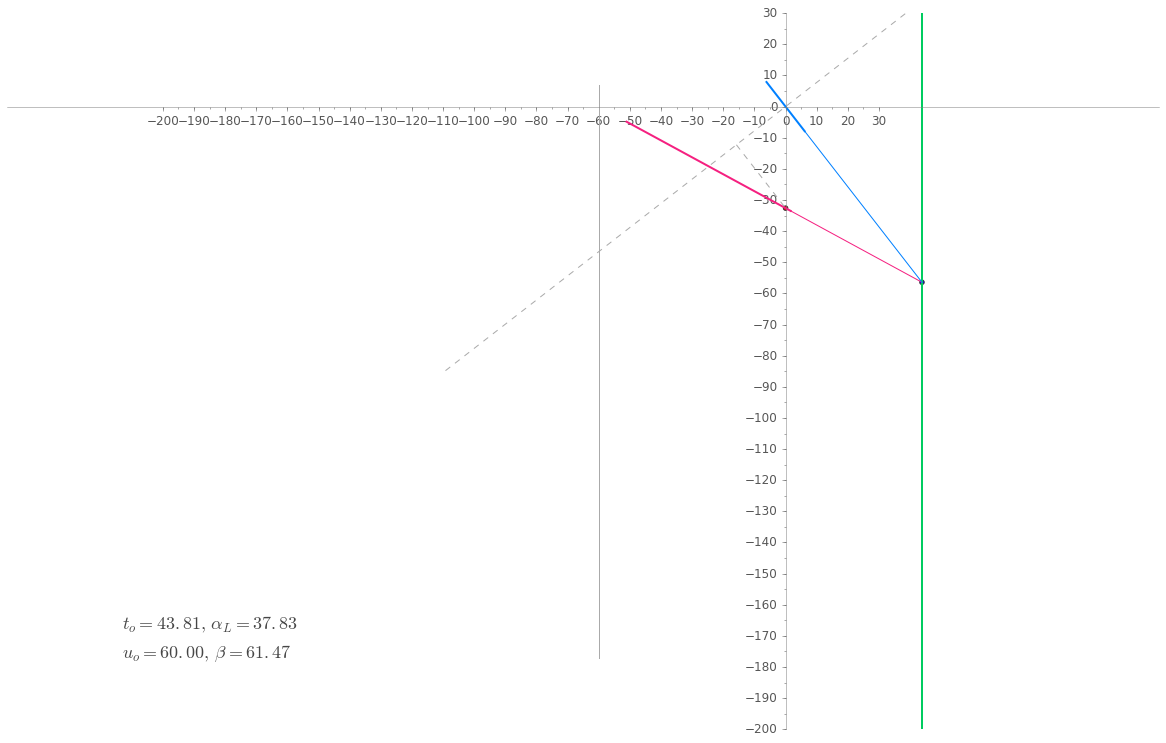

In [10]:
f= 20.0
alphaL = 37.827 # 15.0
uo = 60.0
beta = get_beta(alphaL, f, uo)
alpha = get_alphaL(beta, uo, f)

print("alpha = ", alpha)
render_scheimpflug_lp_tilt(f, uo, alphaL)

#fSldr = FloatSliderWidget(value=20, min=10.0, max=50, step=0.25)
#uoSldr = FloatSliderWidget(value=60, min=20.0, max=200, step=5)
#alphaLSldr = FloatSliderWidget(value=37.827, min=0.0, max=50, step=0.25)
#w = interactive(render_scheimpflug_lp_tilt, f=fSldr, uo=uoSldr, alphaL=alphaLSldr)
#w.msg_throttle = 1
#display(w)

alpha =  10.0
totilde =  28.1799493591


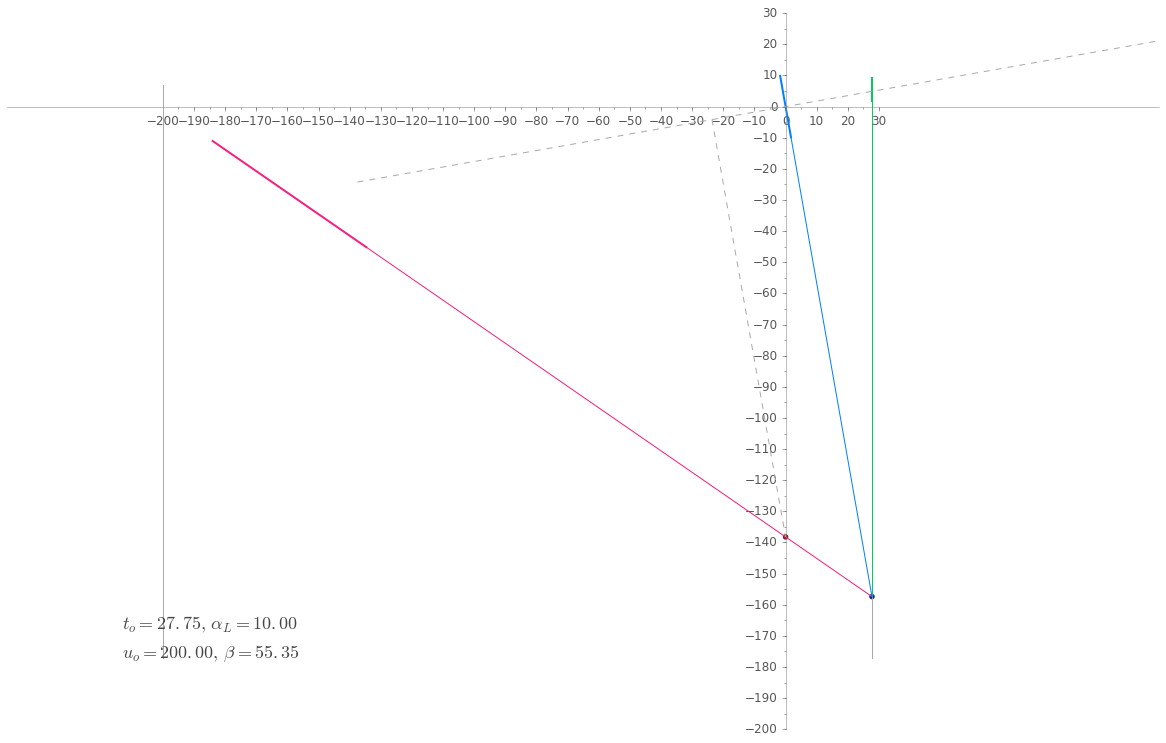

In [13]:
f= 24.0
alphaL = 10 # 15.0
uo = 200.0
beta = get_beta(alphaL, f, uo)
alpha = get_alphaL(beta, uo, f)

print("alpha = ", alpha)
render_scheimpflug_lp_tilt(f, uo, alphaL)

## Lens tilts while keeping image plane angle and distance fixed

In [12]:
#def draw_line(m, c, n=10, xmin=-10, xmax=10, ymin=-10, ymax=10):
#    if m == 0: # parallel to x-axis
#        y = c*np.ones(n)
#        x = np.linspace(xmin, xmax, n)
#    elif abs(m) == 1: # parallel to y-axis
#        pass
#    else:
#        pass
#    return x, y

Equations that govern the object plane (for a thin lens)


$$
z_o = - \frac{z_o' f}{z_o' cos(\alpha) - f}
$$

and

$$
\beta = tan^{-1}\left(\frac{z_o}{f} sin(\alpha)\right)
$$


In [2]:
def get_points(angleY, xo, ymin=-100, ymax=10, n=10):
    """angleY : angle w.r.t. the y-axis in degrees"""
    y = np.linspace(ymin, ymax, n)
    x = xo + y*tand(angleY)
    return x, y

def zo(f, zodash, alpha):
    """alpha: angle w.r.t y axis"""
    return -(zodash*f)/(zodash*cosd(alpha)  - f)

def beta(f, zo, alpha):
    return arctand((abs(zo)/f)*sind(alpha))  # why the explicity abs???

In [3]:
# parameters
zodash = 30
f = 25

uo = gaussian_lens_formula(u=None, v=zodash, f=24).u
print('uo = ', uo)


fig, ax = plt.subplots(1, 1, figsize=(15, 8))
cols = ['#0080FF', '#F52080', '#00CC60', '#B96F20', '#1f77b4', 
        '#ff7f0e', '#2ca02c', '#8c564b', '#00BFFF', '#FF8073',
        '#11FFAA', '#CEb631', '#7088F6', '#f67088', '#80FF80', 
        '#EAC910', '#38A7D0', '#f34060', '#40d370', '#CE8f31', 
        '#2166AC', '#B2182B', '#32b135', '#814D16', '#606060',
        '#0080FF', '#F52080', '#00CC60', '#B96F20', '#1f77b4', 
        '#ff7f0e', '#2ca02c', '#8c564b', '#00BFFF', '#FF8073',
        '#11FFAA', '#CEb631', '#7088F6', '#f67088', '#80FF80', 
        '#EAC910', '#38A7D0', '#f34060', '#40d370', '#CE8f31', 
        '#2166AC', '#B2182B', '#32b135', '#814D16', '#606060']

ymin, ymax = -150, 25
#ymin, ymax = -150, 150

ax.set_xlim(-uo-250, zodash + 10)
ax.set_ylim(ymin, ymax)

ax.axvline(color='#BBBBBB',)
ax.axhline(color='#BBBBBB',)


# draw image plane
ax.axvline(x=zodash, ymin=ymin, ymax=ymax, color='#CCCCCC')
x, y = get_points(0, zodash, -10, 10)
ax.plot(x, y, color='#222222', lw=2,)

# draw lens plane
#alpha = np.linspace(-30, 30, 50)
alpha = np.linspace(-25, 0, 5)

for i, each in enumerate(alpha):
    #print('alpha', each)
    x, y = get_points(each, 0, ymin, ymax-5)
    ax.plot(x, y, color=cols[i], alpha=0.4)
    x, y = get_points(each, 0, -10, 10)
    #ax.plot(x, y, color=cols[i], lw=2)
    
# draw object plane
for i, each in enumerate(alpha):
    xo = zo(f, zodash, each)
    angleY = beta(f, xo, each)
    #print('beta', angleY)
    x, y = get_points(angleY, xo, ymin, ymax-5)
    ax.plot(x, y, color=cols[i], alpha=0.4)
    x, y = get_points(angleY, xo, -10, 10)
    #ax.plot(x, y, color=cols[i], lw=2)
    

plt.show()

uo =  120.0


In [63]:
arctand(-0.08715574274765817)

-4.9810693937002029